In [66]:
import healpy as hp
import numpy as np
import pyfits as pf
import matplotlib.pyplot as plt
import healconv as hc
%matplotlib inline

In [67]:
Tmape=hp.read_map("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/real/HFI_SkyMap_217_512dg_R2.02_full_ECL.fits")

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [93]:
tleakT=hp.read_map("TLeakT.fits")
tleakU=hp.read_map("TLeakU.fits")
tleakQ=hp.read_map("TLeakQ.fits")

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [94]:
np.isnan(tleakQ).sum()*1.0/len(tleakT)

0.0

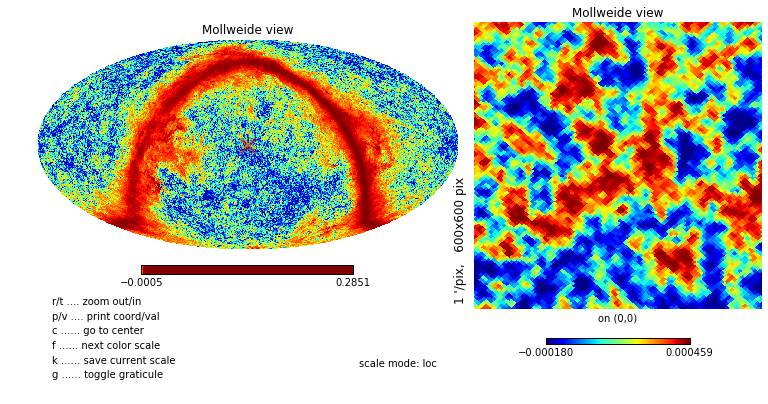

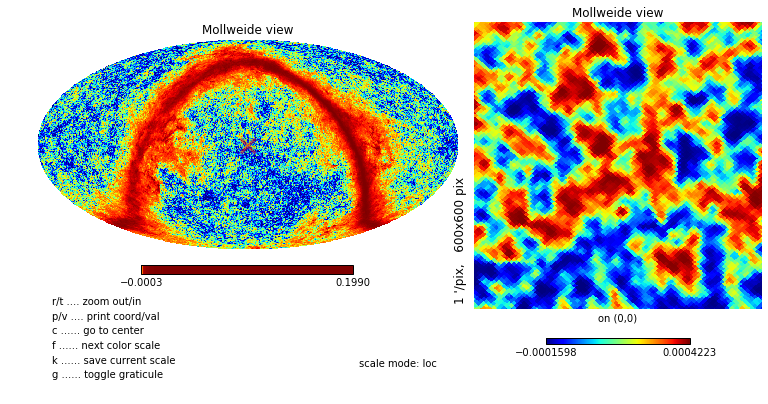

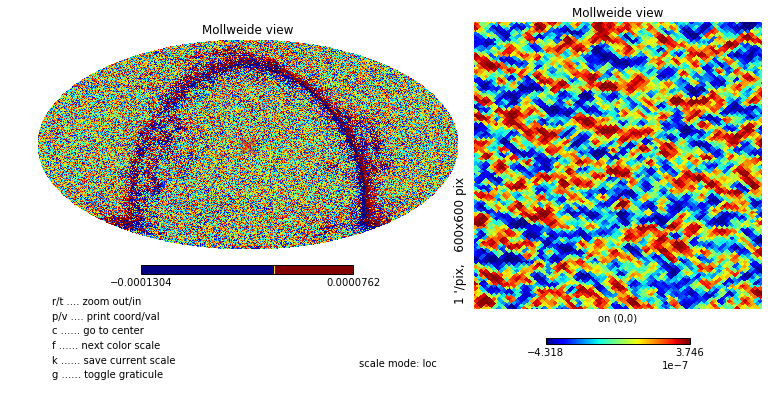

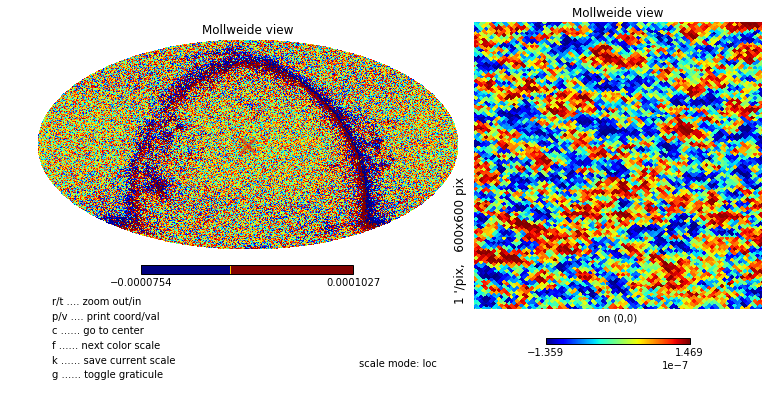

In [95]:
hp.mollzoom(Tmape,norm='hist')
hp.mollzoom(tleakT,norm='hist')
hp.mollzoom(tleakQ,norm='hist')
hp.mollzoom(tleakU,norm='hist')

In [96]:
cl1=hp.anafast(Tmape)
cl2=hp.anafast(tleakT)
cl3=hp.anafast(tleakQ)
cl4=hp.anafast(tleakU)
trip=trip=(np.zeros(len(tleakQ)),tleakQ,tleakQ)
cl5=hp.anafast(trip)

[]

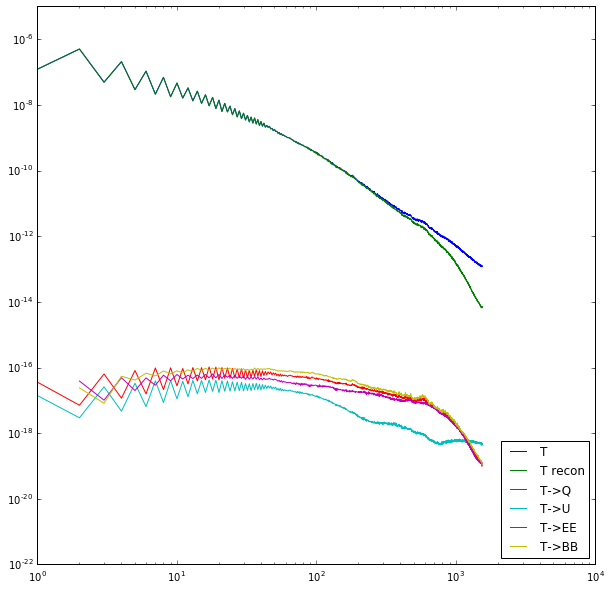

In [110]:
plt.figure(figsize=(10,10))
plt.plot(cl1,label="T")
plt.plot(cl2,label="T recon")
plt.plot(cl3,label="T->Q")
plt.plot(cl4,label="T->U")
plt.plot(cl5[1],label="T->EE")
plt.plot(cl5[2],label="T->BB")
plt.legend(loc='lower right')
plt.loglog()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


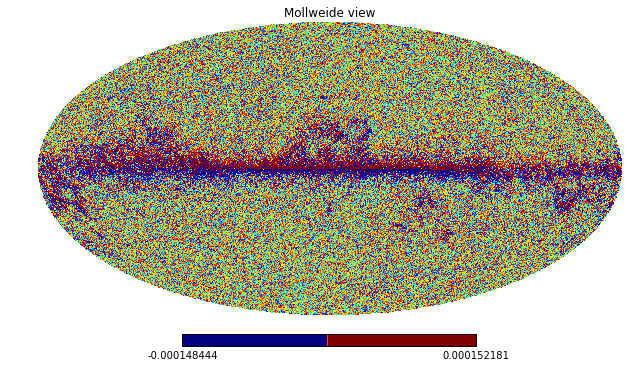

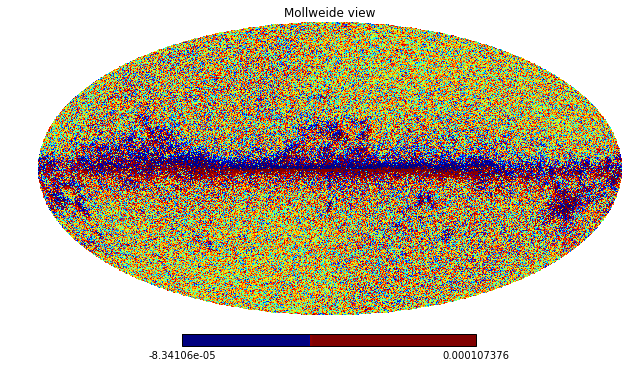

In [108]:
## now rotate back
psi,theta,phi= -3.9918090306328524E-004,1.0504796200761286,        1.6822178082198811    
almq=hp.map2alm(tleakQ)
almu=hp.map2alm(tleakU)
Nside=512
hp.rotate_alm(almq,psi,theta,phi) ## rotate rotates in-place
hp.rotate_alm(almu,psi,theta,phi) ## rotate rotates in-place
tleakQg=hp.alm2map(almq,Nside)
tleakUg=hp.alm2map(almu,Nside)
plt.figure()
hp.mollview(tleakQg,norm='hist')
plt.figure()
hp.mollview(tleakUg,norm='hist')

In [112]:
trip=(np.zeros(len(tleakQg)),tleakQg,tleakUg)
hp.write_map ("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/T2Pleakage/T2QU_217_512.fits",trip)